In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("labels.csv")

In [22]:
selected = ["tibetan_mastiff", "pug", "afghan_hound", "golden_retriever"]

In [ ]:
df = df[(df["breed"].isin(selected))]
df = labels.reset_index()

In [25]:
df.shape

(346, 4)

In [29]:
X = np.zeros((346, 224, 224, 3), dtype="float32")
Y = label_binarize(df["breed"], classes=selected)

In [30]:
for i, img_id in enumerate(df["id"]):
    img_path = f"train/{img_id}.jpg"
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    X[i] = img_array / 255.0

In [31]:
X.shape, X.size

((346, 224, 224, 3), 52082688)

In [32]:
Y.shape, Y.size

((346, 4), 1384)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4242)

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [82]:
model = Sequential([
    Conv2D(64, (5,5), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation="relu", kernel_regularizer="l2"),
    MaxPooling2D((2,2)),
    Conv2D(16, (7,7), activation="relu", kernel_regularizer="l2"),
    MaxPooling2D((2,2)),
    Conv2D(8, (3,3), activation="relu", kernel_regularizer="l2"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu", kernel_regularizer="l2"),
    Dense(64, activation="relu", kernel_regularizer="l2"),
    Dense(4, activation="softmax")
])

In [83]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 16)      

In [85]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 5.2341 - accuracy: 0.2136 - val_loss: 5.0228 - val_accuracy: 0.3393
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 4.9670 - accuracy: 0.3500 - val_loss: 4.7867 - val_accuracy: 0.3393
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 4.7525 - accuracy: 0.3409 - val_loss: 4.5583 - val_accuracy: 0.3393
Epoch 4/10
2/2 [==============================] - 6s 2s/step - loss: 4.5269 - accuracy: 0.3545 - val_loss: 4.3685 - val_accuracy: 0.3214
Epoch 5/10
2/2 [==============================] - 6s 2s/step - loss: 4.3340 - accuracy: 0.3682 - val_loss: 4.1644 - val_accuracy: 0.3393
Epoch 6/10
2/2 [==============================] - 6s 2s/step - loss: 4.1371 - accuracy: 0.3727 - val_loss: 3.9728 - val_accuracy: 0.3571
Epoch 7/10
2/2 [==============================] - 6s 3s/step - loss: 3.9201 - accuracy: 0.4136 - val_loss: 3.7742 - val_accuracy: 0.3571
Epoch 8/10
2/2 [=========================

In [88]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 115ms/step - loss: 3.4077 - accuracy: 0.4143


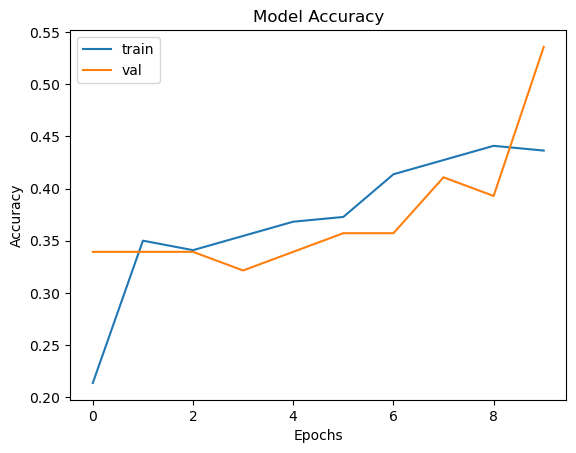

In [89]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

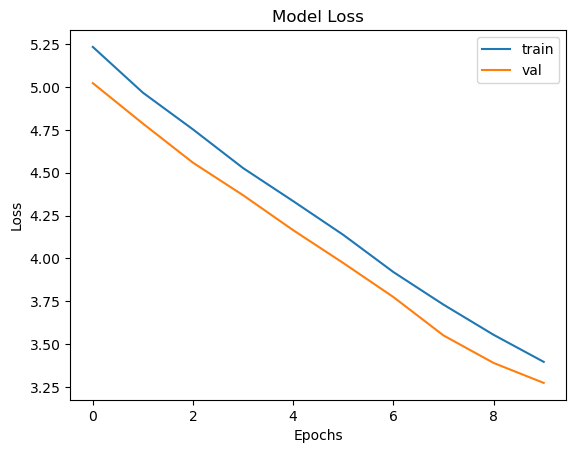

In [91]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [95]:
count = 0
for i in range(1, 70):
    if df["breed"][np.argmax(y_test[i])] == df["breed"][np.argmax(y_pred[i])]:
        count += 1
        
print(count , "%")

49 %
